In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
markov_chain = np.array([[0.0,0.6,0.4],[0.3,0.0,0.7],[0.85,0.15,0.0]])
beta = np.array([1,1/2,1/3])

(a) Simulate and plot a single realization of X(t) between t = 0 and t = 1000 . (Notice this is a
continuous time chain, it will move not necessarily on integer time epochs. )

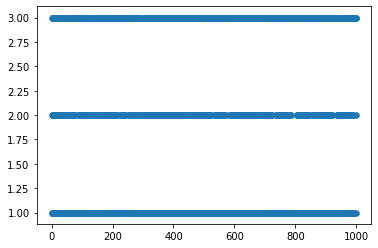

In [41]:
def markov_chain_simulation(markov_chain, beta, T = 1000):
    results = []
    time = []
    length = []
    xi = 0
    t = np.random.exponential(beta[xi])
    results.append(1)
    time.append(t)
    length.append(t)
    
    while(t <= T):
        xi = np.random.choice([0,1,2], p = markov_chain[xi])
        l = np.random.exponential(beta[xi])
        t += l
        time.append(t)
        length.append(l)
        results.append(xi + 1)
        
    return time, results, length

X,Y,I = markov_chain_simulation(markov_chain, beta)
plt.scatter(X,Y, linewidth = 0.5)

(b)Compute the stationary distribution of the CTMC and, from it, the long-run average expected
reward. How does this number compare the number you obtained from the simulation.

In [42]:
print(markov_chain)

[[0.   0.6  0.4 ]
 [0.3  0.   0.7 ]
 [0.85 0.15 0.  ]]


In [43]:
beta2 = np.array([1,2,3])
Q = (markov_chain.T * beta2).T
print(Q)

[[0.   0.6  0.4 ]
 [0.6  0.   1.4 ]
 [2.55 0.45 0.  ]]


In [44]:
Q[0][0] = -1
Q[1][1] =-2
Q[2][2] = -3
print(Q)

[[-1.    0.6   0.4 ]
 [ 0.6  -2.    1.4 ]
 [ 2.55  0.45 -3.  ]]


In [46]:
s = beta2 **2@[537/899, 198/899, 164/899]
print(s)

3.1201334816462736


In [52]:
i = np.array(I)
y = np.array(Y)
sum((y**2)*i)/1000

3.0594543292192875

There is some difference but they are almost the same. They are close.